In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
books = pd.read_csv('dataset/books.csv')
users = pd.read_csv('dataset/users.csv')
ratings = pd.read_csv('dataset/ratings.csv')

C:\Users\prana\AppData\Local\Temp\ipykernel_98496\1565029086.py:1: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  books = pd.read_csv('dataset/books.csv')


In [3]:
books['Image-URL-M'][1]

'http://images.amazon.com/images/P/0002005018.01.MZZZZZZZ.jpg'

In [4]:
books.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [5]:
users.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [6]:
ratings.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [7]:
print(books.shape)
print(ratings.shape)
print(users.shape)

(271360, 8)
(1149780, 3)
(278858, 3)


In [8]:
books.isnull().sum()

ISBN                   0
Book-Title             0
Book-Author            2
Year-Of-Publication    0
Publisher              2
Image-URL-S            0
Image-URL-M            0
Image-URL-L            3
dtype: int64

In [9]:
users.isnull().sum()

User-ID          0
Location         0
Age         110762
dtype: int64

In [10]:
ratings.isnull().sum()

User-ID        0
ISBN           0
Book-Rating    0
dtype: int64

In [11]:
books.duplicated().sum()

np.int64(0)

In [12]:
ratings.duplicated().sum()

np.int64(0)

In [13]:
users.duplicated().sum()

np.int64(0)

## Model 0 : Popularity Based Recommender System

In [14]:
ratings_with_name = ratings.merge(books,on='ISBN')

In [15]:
num_rating_df = ratings_with_name.groupby('Book-Title').count()['Book-Rating'].reset_index()
num_rating_df.rename(columns={'Book-Rating':'num_ratings'},inplace=True)
num_rating_df

,Book-Title,num_ratings
0,A Light in the Storm: The Civil War Diary of ...,4
1,Always Have Popsicles,1
2,Apple Magic (The Collector's series),1
3,"Ask Lily (Young Women of Faith: Lily Series, ...",1
4,Beyond IBM: Leadership Marketing and Finance ...,1
...,...,...
241066,Ã?Â?lpiraten.,2
241067,Ã?Â?rger mit Produkt X. Roman.,4
241068,Ã?Â?sterlich leben.,1
241069,Ã?Â?stlich der Berge.,3


In [16]:
avg_rating_df = ratings_with_name.groupby('Book-Title')['Book-Rating'].mean().reset_index()
avg_rating_df.rename(columns={'Book-Rating': 'avg_rating'}, inplace=True)
avg_rating_df

,Book-Title,avg_rating
0,A Light in the Storm: The Civil War Diary of ...,2.250000
1,Always Have Popsicles,0.000000
2,Apple Magic (The Collector's series),0.000000
3,"Ask Lily (Young Women of Faith: Lily Series, ...",8.000000
4,Beyond IBM: Leadership Marketing and Finance ...,0.000000
...,...,...
241066,Ã?Â?lpiraten.,0.000000
241067,Ã?Â?rger mit Produkt X. Roman.,5.250000
241068,Ã?Â?sterlich leben.,7.000000
241069,Ã?Â?stlich der Berge.,2.666667


In [17]:
popular_df = num_rating_df.merge(avg_rating_df,on='Book-Title')
popular_df

,Book-Title,num_ratings,avg_rating
0,A Light in the Storm: The Civil War Diary of ...,4,2.250000
1,Always Have Popsicles,1,0.000000
2,Apple Magic (The Collector's series),1,0.000000
3,"Ask Lily (Young Women of Faith: Lily Series, ...",1,8.000000
4,Beyond IBM: Leadership Marketing and Finance ...,1,0.000000
...,...,...,...
241066,Ã?Â?lpiraten.,2,0.000000
241067,Ã?Â?rger mit Produkt X. Roman.,4,5.250000
241068,Ã?Â?sterlich leben.,1,7.000000
241069,Ã?Â?stlich der Berge.,3,2.666667


In [18]:
popular_df = popular_df[popular_df['num_ratings']>=250].sort_values('avg_rating',ascending=False).head(50)

In [19]:
popular_df = popular_df.merge(books,on='Book-Title').drop_duplicates('Book-Title')[['Book-Title','Book-Author','Image-URL-M','num_ratings','avg_rating']]

In [20]:
popular_df['Image-URL-M'][0]

'http://images.amazon.com/images/P/0439136350.01.MZZZZZZZ.jpg'

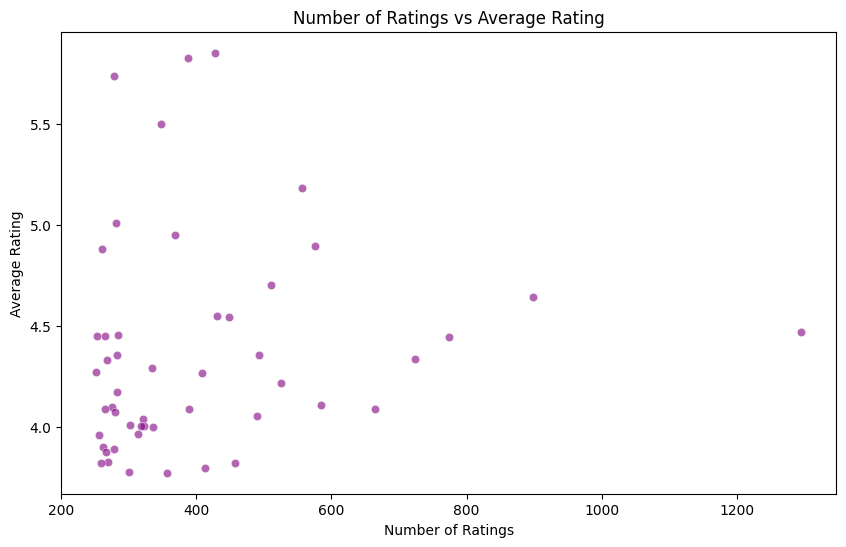

In [21]:
# Scatter plot of number of ratings vs average ratings

plt.figure(figsize=(10, 6))
sns.scatterplot(x='num_ratings', y='avg_rating', data=popular_df, color='purple', alpha=0.6)
plt.title('Number of Ratings vs Average Rating')
plt.xlabel('Number of Ratings')
plt.ylabel('Average Rating')
plt.show()

## Model 1 : Collaborative Filtering Based Recommender System

In [22]:
x = ratings_with_name.groupby('User-ID').count()['Book-Rating'] > 200
padhe_likhe_users = x[x].index

In [23]:
filtered_rating = ratings_with_name[ratings_with_name['User-ID'].isin(padhe_likhe_users)]

In [24]:
y = filtered_rating.groupby('Book-Title').count()['Book-Rating']>=50
famous_books = y[y].index

In [25]:
final_ratings = filtered_rating[filtered_rating['Book-Title'].isin(famous_books)]

In [26]:
pt = final_ratings.pivot_table(index='Book-Title',columns='User-ID',values='Book-Rating')

In [27]:
pt.fillna(0,inplace=True)

In [28]:
pt

User-ID,254,2276,2766,2977,3363,4017,4385,6251,6323,6543,...,271705,273979,274004,274061,274301,274308,275970,277427,277639,278418
Book-Title,,,,,,,,,,,,,,,,,,,,,
1984,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1st to Die: A Novel,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2nd Chance,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4 Blondes,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A Bend in the Road,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Year of Wonders,0.0,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
You Belong To Me,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Zen and the Art of Motorcycle Maintenance: An Inquiry into Values,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [29]:
from sklearn.metrics.pairwise import cosine_similarity

In [30]:
similarity_scores = cosine_similarity(pt)

In [31]:
similarity_scores.shape

(706, 706)

In [32]:
def recommend(book_name):
    # index fetch
    index = np.where(pt.index==book_name)[0][0]
    similar_items = sorted(list(enumerate(similarity_scores[index])),key=lambda x:x[1],reverse=True)[1:5]
    
    data = []
    for i in similar_items:
        item = []
        temp_df = books[books['Book-Title'] == pt.index[i[0]]]
        item.extend(list(temp_df.drop_duplicates('Book-Title')['Book-Title'].values))
        item.extend(list(temp_df.drop_duplicates('Book-Title')['Book-Author'].values))
        item.extend(list(temp_df.drop_duplicates('Book-Title')['Image-URL-M'].values))
        
        data.append(item)
    
    return data

In [33]:
recommend('1984')

[['Animal Farm',
  'George Orwell',
  'http://images.amazon.com/images/P/0451526341.01.MZZZZZZZ.jpg'],
 ["The Handmaid's Tale",
  'Margaret Atwood',
  'http://images.amazon.com/images/P/0449212602.01.MZZZZZZZ.jpg'],
 ['Brave New World',
  'Aldous Huxley',
  'http://images.amazon.com/images/P/0060809833.01.MZZZZZZZ.jpg'],
 ['The Vampire Lestat (Vampire Chronicles, Book II)',
  'ANNE RICE',
  'http://images.amazon.com/images/P/0345313860.01.MZZZZZZZ.jpg']]

In [34]:
pt.index[545]

"The Handmaid's Tale"

In [35]:
import pickle
pickle.dump(popular_df,open('artifacts/popular.pkl','wb'))

In [36]:
books.drop_duplicates('Book-Title')

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...
...,...,...,...,...,...,...,...,...
271354,0449906736,Flashpoints: Promise and Peril in a New World,Robin Wright,1993,Ballantine Books,http://images.amazon.com/images/P/0449906736.0...,http://images.amazon.com/images/P/0449906736.0...,http://images.amazon.com/images/P/0449906736.0...
271356,0525447644,From One to One Hundred,Teri Sloat,1991,Dutton Books,http://images.amazon.com/images/P/0525447644.0...,http://images.amazon.com/images/P/0525447644.0...,http://images.amazon.com/images/P/0525447644.0...
271357,006008667X,Lily Dale : The True Story of the Town that Ta...,Christine Wicker,2004,HarperSanFrancisco,http://images.amazon.com/images/P/006008667X.0...,http://images.amazon.com/images/P/006008667X.0...,http://images.amazon.com/images/P/006008667X.0...
271358,0192126040,Republic (World's Classics),Plato,1996,Oxford University Press,http://images.amazon.com/images/P/0192126040.0...,http://images.amazon.com/images/P/0192126040.0...,http://images.amazon.com/images/P/0192126040.0...


In [37]:
pickle.dump(pt,open('artifacts/pt.pkl','wb'))
pickle.dump(books,open('artifacts/books.pkl','wb'))
pickle.dump(similarity_scores,open('artifacts/similarity_scores.pkl','wb'))

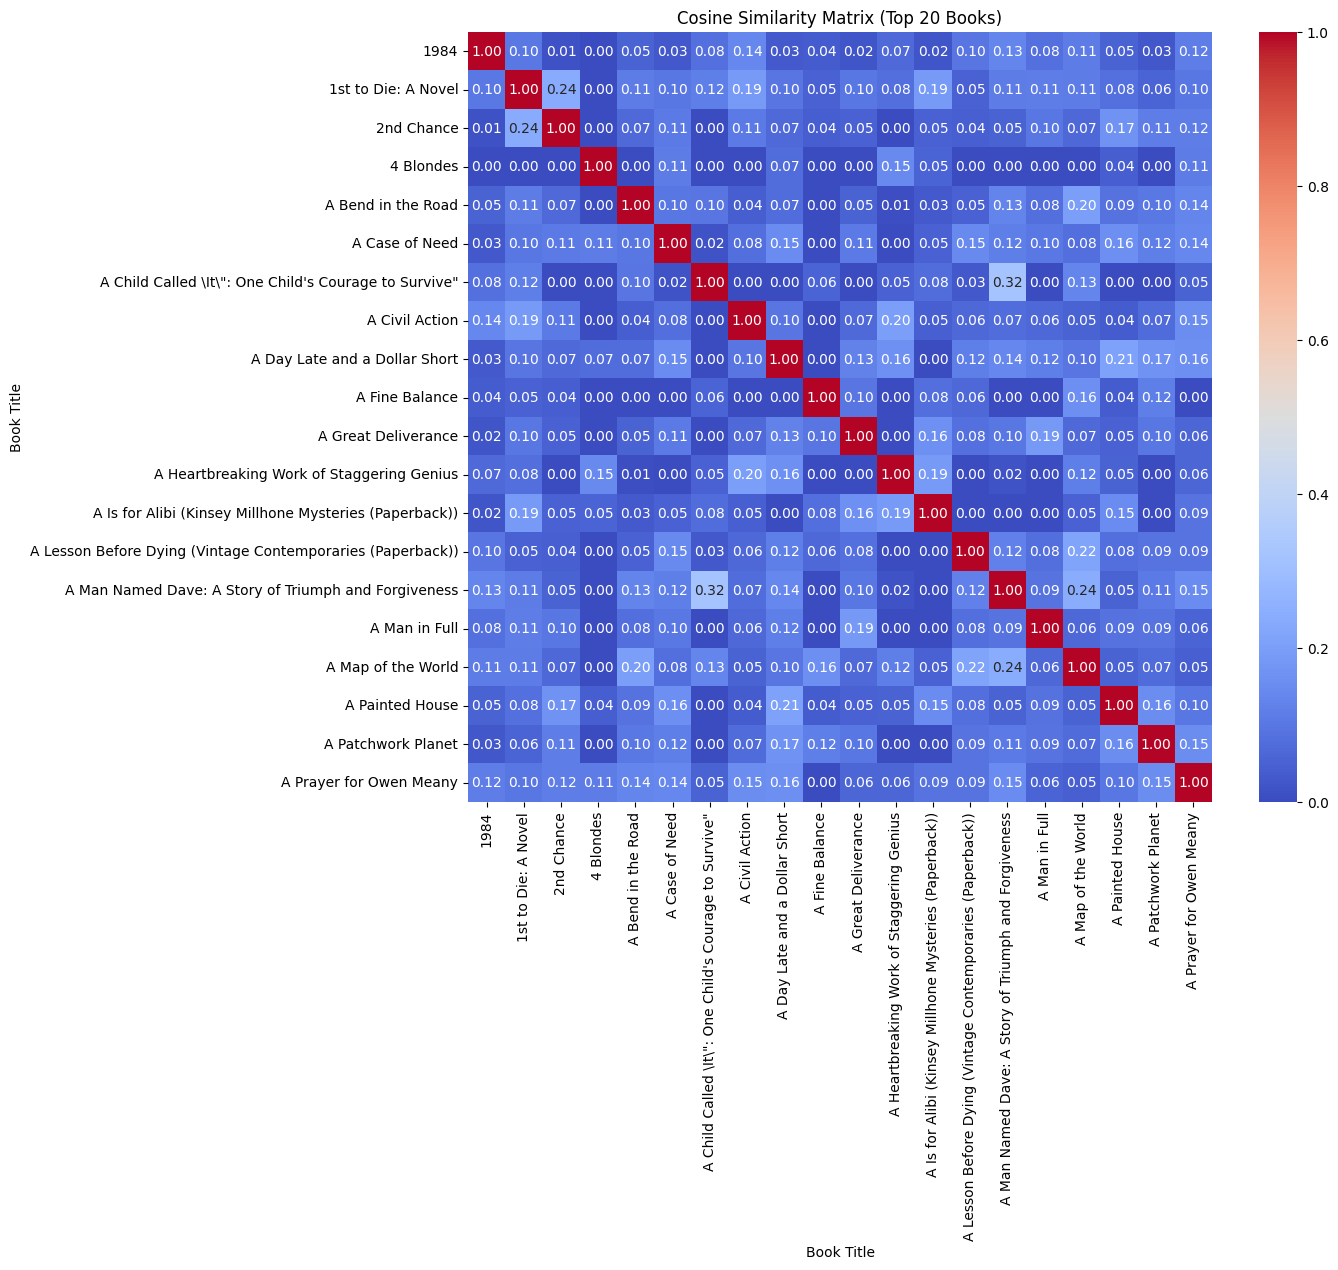

In [38]:
plt.figure(figsize=(12, 10))
sns.heatmap(similarity_scores[:20, :20], cmap='coolwarm', annot=True, fmt='.2f', xticklabels=pt.index[:20], yticklabels=pt.index[:20])
plt.title('Cosine Similarity Matrix (Top 20 Books)')
plt.xlabel('Book Title')
plt.ylabel('Book Title')
plt.show()


## Model 2 : K-Means Cluster

In [39]:
books.columns

books['Book-Title'].head(20)

0                                   Classical Mythology
1                                          Clara Callan
2                                  Decision in Normandy
3     Flu: The Story of the Great Influenza Pandemic...
4                                The Mummies of Urumchi
5                                The Kitchen God's Wife
6     What If?: The World's Foremost Military Histor...
7                                       PLEADING GUILTY
8     Under the Black Flag: The Romance and the Real...
9               Where You'll Find Me: And Other Stories
10                          Nights Below Station Street
11    Hitler's Secret Bankers: The Myth of Swiss Neu...
12                                   The Middle Stories
13                                             Jane Doe
14    A Second Chicken Soup for the Woman's Soul (Ch...
15         The Witchfinder (Amos Walker Mystery Series)
16    More Cunning Than Man: A Social History of Rat...
17                        Goodbye to the Butterm

In [40]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
import pickle

# Prepare metadata text for each book
books['metadata'] = (
    books['Book-Title'].fillna('').astype(str) + ' ' +
    books['Book-Author'].fillna('').astype(str) + ' ' +
    books['Year-Of-Publication'].fillna('').astype(str) + ' ' +
    books['Publisher'].fillna('').astype(str)
)

# TF-IDF Vectorization of metadata
tfidf = TfidfVectorizer(stop_words='english', max_features=5000)
tfidf_matrix = tfidf.fit_transform(books['metadata'])

# Choose number of clusters 
num_clusters = 20

# KMeans clustering on TF-IDF vectors
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
clusters = kmeans.fit_predict(tfidf_matrix)

# Add cluster labels to books dataframe
books['cluster'] = clusters

# Save vectorizer, kmeans model and books dataframe with clusters
pickle.dump(tfidf, open('artifacts/tfidf_vectorizer.pkl', 'wb'))
pickle.dump(kmeans, open('artifacts/kmeans_model.pkl', 'wb'))
pickle.dump(books, open('artifacts/books_with_clusters.pkl', 'wb'))

# --- New recommendation function based on cluster ---

def recommend_books_kmeans(book_title, n_recommendations=5, similarity_threshold=0.9):
    # Load saved models and data
    tfidf = pickle.load(open('artifacts/tfidf_vectorizer.pkl', 'rb'))
    kmeans = pickle.load(open('artifacts/kmeans_model.pkl', 'rb'))
    books = pickle.load(open('artifacts/books_with_clusters.pkl', 'rb'))

    # Reset index to ensure we are working with clean positional indices
    books = books.reset_index(drop=True)

    # Find index of input book
    book_idx = books[books['Book-Title'].str.lower() == book_title.lower()].index
    if len(book_idx) == 0:
        raise ValueError(f"Book '{book_title}' not found in dataset.")
    book_idx = book_idx[0]

    # Get the cluster label for the input book
    book_cluster = books.at[book_idx, 'cluster']

    # Select books from the same cluster
    cluster_books = books[books['cluster'] == book_cluster].copy().reset_index(drop=True)

    # Drop the input book from the cluster
    input_book = books.iloc[book_idx]
    cluster_books = cluster_books[
        ~(
            (cluster_books['Book-Title'].str.strip().str.lower() == input_book['Book-Title'].strip().lower()) &
            (cluster_books['Book-Author'].str.strip().str.lower() == input_book['Book-Author'].strip().lower()) &
            (cluster_books['ISBN'].str.strip().str.lower() == input_book['ISBN'].strip().lower())
        )
    ].reset_index(drop=True)

    # If no other books in the cluster, return empty list
    if cluster_books.empty:
        return []

    # Re-transform the full metadata to TF-IDF matrix
    tfidf_matrix = tfidf.transform(books['metadata'])
    book_vec = tfidf_matrix[book_idx]  # Vector for the input book

    # Build a mapping from cluster_books to positional indices in the TF-IDF matrix
    cluster_indices = books[books['cluster'] == book_cluster].index
    cluster_indices = cluster_indices[~(
        (books.loc[cluster_indices, 'Book-Title'].str.strip().str.lower() == input_book['Book-Title'].strip().lower()) &
        (books.loc[cluster_indices, 'Book-Author'].str.strip().str.lower() == input_book['Book-Author'].strip().lower()) &
        (books.loc[cluster_indices, 'ISBN'].str.strip().str.lower() == input_book['ISBN'].strip().lower())
    )]

    cluster_vecs = tfidf_matrix[cluster_indices]

    # Compute cosine similarity
    similarities = cosine_similarity(book_vec, cluster_vecs).flatten()

    # Get most similar books
    similar_idx = similarities.argsort()[::-1]

    recommended = []
    seen_titles = set()

    for idx in similar_idx:
        book_data = books.iloc[cluster_indices[idx]]
        sim_score = similarities[idx]

        if sim_score < similarity_threshold:
            continue

        key = (book_data['Book-Title'].strip().lower(), book_data['Book-Author'].strip().lower())
        if key in seen_titles:
            continue

        seen_titles.add(key)
        recommended.append({
            'title': book_data['Book-Title'],
            'author': book_data['Book-Author'],
            'image_url': book_data['Image-URL-M']
        })

        if len(recommended) >= n_recommendations:
            break

    return recommended